<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  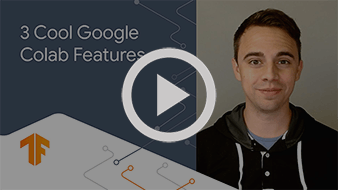
  </a>
</center>

In [ ]:
from pandas.core.indexes.datetimes import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from datetime import date
from datetime import timedelta
import warnings
import os
import sys
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
application = pd.read_csv("/content/application_record.csv")

In [ ]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application.isna().sum()/application.shape[0]*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [ ]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit = pd.read_csv("/content/credit_record.csv")
credit.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,7
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,6
5,5001712,-1,6
6,5001712,-2,6
7,5001712,-3,6
8,5001712,-4,6
9,5001712,-5,6


In [ ]:
#merge two datasets
final_ds = pd.merge(application, credit, on='ID', how='inner')
credit[credit['ID'] == 5008804].nunique()

ID                 1
MONTHS_BALANCE    16
STATUS             4
dtype: int64

In [ ]:
# finding null values after merging two datasets
final_ds.isna().sum()/final_ds.shape[0]*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

In [ ]:
# REPLACE BLANK VALUES WITH NaN AND THEN REPLACE NaN WITH 'OTHERS'
#final_ds['OCCUPATION_TYPE'] = final_ds[['OCCUPATION_TYPE']].apply(lambda x: x.str.strip()).replace('', np.nan)
#final_ds['OCCUPATION_TYPE'] = final_ds['OCCUPATION_TYPE'].replace(' ',np.nan,regex=True)
#final_ds.isna().sum()/final_ds.shape[0]*100
final_ds=final_ds.mask(final_ds == '')
final_ds['OCCUPATION_TYPE'].fillna('Others',inplace=True)
#final_ds.head(100)
final_ds['OCCUPATION_TYPE'].unique()

array(['Others', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [ ]:
# Find the imbalance in data
#final_ds['CODE_GENDER'] = pd.Categorical(final_ds['CODE_GENDER'])
#final_ds['FLAG_OWN_CAR'] = pd.Categorical(final_ds['FLAG_OWN_CAR'])
#final_ds['FLAG_OWN_REALTY'] = pd.Categorical(final_ds['FLAG_OWN_REALTY'])
#final_ds['NAME_INCOME_TYPE'] = pd.Categorical(final_ds['NAME_INCOME_TYPE'])
#final_ds['NAME_EDUCATION_TYPE'] = pd.Categorical(final_ds['NAME_EDUCATION_TYPE'])
#final_ds['NAME_FAMILY_STATUS'] = pd.Categorical(final_ds['NAME_FAMILY_STATUS'])
#final_ds['NAME_HOUSING_TYPE'] = pd.Categorical(final_ds['NAME_HOUSING_TYPE'])
#final_ds['OCCUPATION_TYPE'] = pd.Categorical(final_ds['OCCUPATION_TYPE'])
#final_ds[['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']] = final_ds[['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']].astype(int)
final_ds['STATUS'].unique()
final_ds['STATUS'].value_counts()/final_ds.shape[0]*100

6    42.372334
0    37.372817
7    18.766515
1     1.124705
5     0.196344
2     0.102994
3     0.036774
4     0.027517
Name: STATUS, dtype: float64

In [ ]:
# Labelencoder of categorical and object variables
# CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE 
le = LabelEncoder()
for col in final_ds.columns:
  if final_ds[col].dtypes == 'object':
    final_ds[col] = le.fit_transform(final_ds[col])
final_ds['NAME_HOUSING_TYPE'].unique()
#final_ds.info()

array([4, 1, 2, 5, 0, 3])

<Axes: >

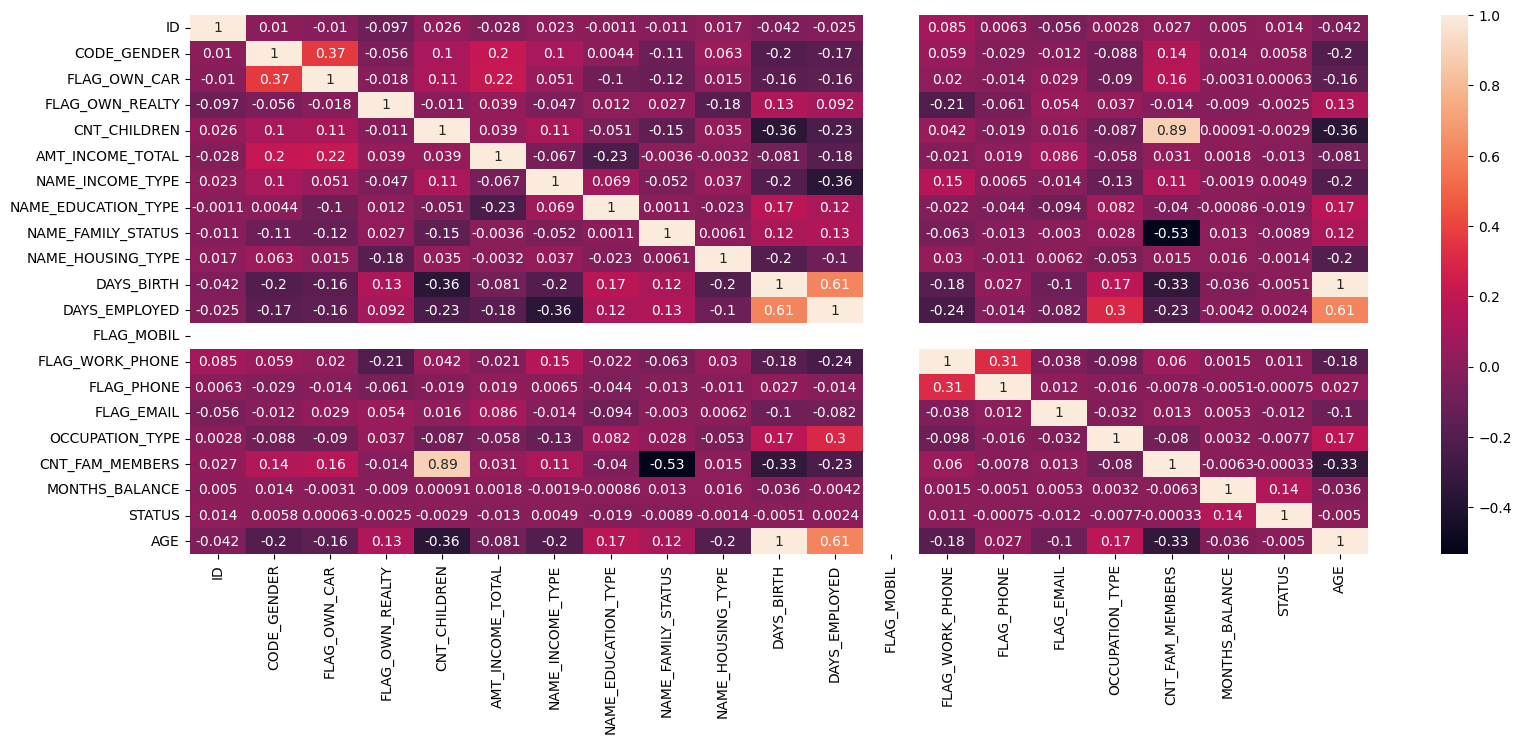

In [ ]:
# heatmap to find correlation
plt.figure(figsize=(19,7))
sns.heatmap(final_ds.corr(), annot=True)
#final_ds.info()
#final_ds['FLAG_MOBIL'].unique()

<Axes: >

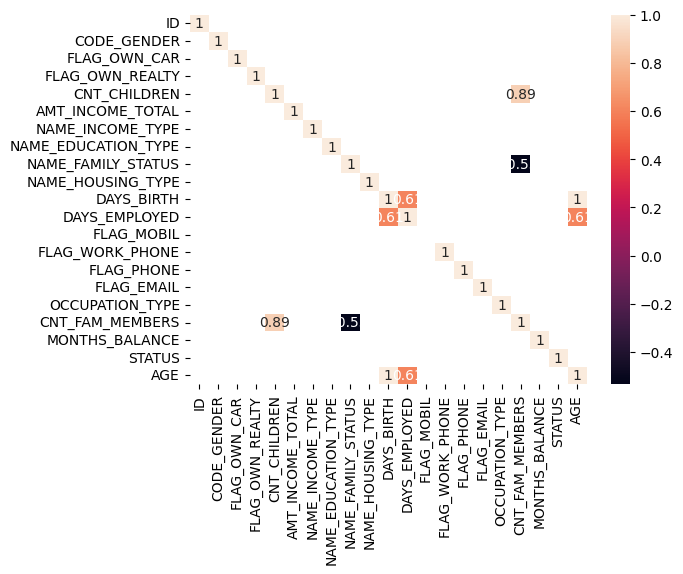

In [ ]:
from pickle import TRUE
 # Select upper triangle of correlation matrix to select subset of variables/features
#final_ds.corrwith(final_ds['STATUS'])
corr_matrix = final_ds.corr()
sns.heatmap(corr_matrix[(corr_matrix >= 0.4) | (corr_matrix <= -0.4)], annot=True)
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int64  
 7   NAME_EDUCATION_TYPE  777715 non-null  int64  
 8   NAME_FAMILY_STATUS   777715 non-null  int64  
 9   NAME_HOUSING_TYPE    777715 non-null  int64  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CODE_GENDER'}>,
        <Axes: title={'center': 'FLAG_OWN_CAR'}>,
        <Axes: title={'center': 'FLAG_OWN_REALTY'}>],
       [<Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'NAME_INCOME_TYPE'}>,
        <Axes: title={'center': 'NAME_EDUCATION_TYPE'}>],
       [<Axes: title={'center': 'NAME_FAMILY_STATUS'}>,
        <Axes: title={'center': 'NAME_HOUSING_TYPE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>],
       [<Axes: title={'center': 'OCCUPATION_TYPE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>,
        <Axes: title={'c

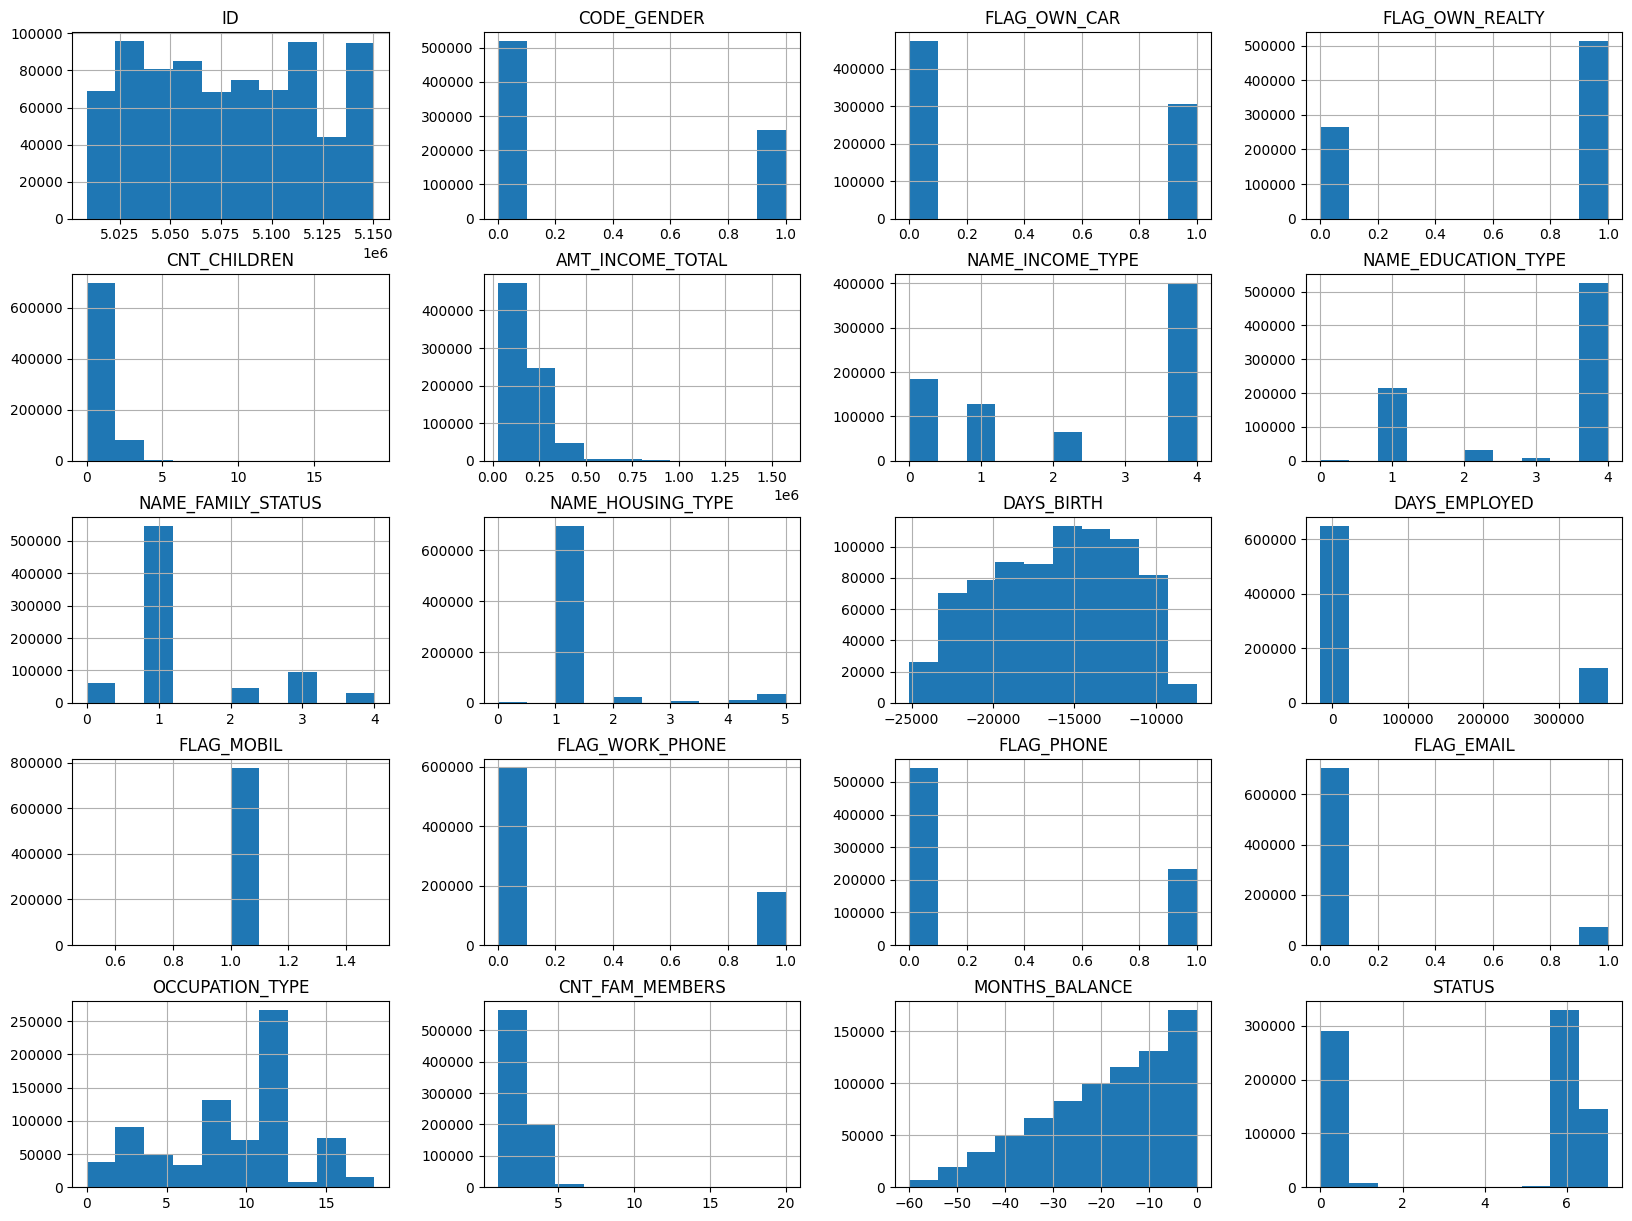

In [ ]:
# Data Visualization histogram
final_ds.hist(figsize=(20,15))

<Axes: >

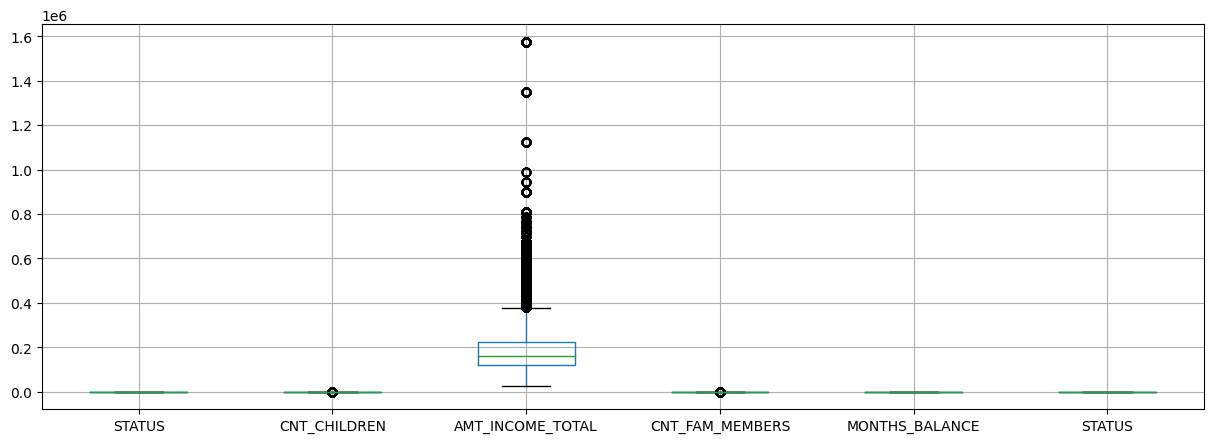

In [ ]:
# Data Visualization boxplot
#sns.boxplot(data=final_ds)
relevant_cols = ['STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']
# Subset dataframe to select only relevant columns
subset_final_ds = final_ds[relevant_cols]
plt.figure(figsize=(15,5))
subset_final_ds.boxplot()

In [ ]:
from re import X
# split dataset
X=final_ds.iloc[:, :-1]
y=final_ds.iloc[:,-1]

In [ ]:
# split dataset in train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# initialize random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# train the classifier on training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# prediction on test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
#confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average='micro')
#r2 = r2_score(y_test, y_pred)
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall Score:', recall*100)
for label in sorted(set(y_test)):
    f1 = f1_score(y_test, clf.predict(X_test), average=None, labels=[label])[0]
    print(f"F1 score for class {label}: {f1*100:.2f}")
#print('Confusion Matrix:', confusion_matrix)
#print('R2:', r2)

Accuracy: 88.43342355490121
Precision: 88.277481698094
Recall Score: 88.43342355490121
F1 score for class 0: 86.24
F1 score for class 1: 29.21
F1 score for class 2: 14.51
F1 score for class 3: 3.85
F1 score for class 4: 8.11
F1 score for class 5: 86.28
F1 score for class 6: 95.22
F1 score for class 7: 81.21


In [ ]:
# Extract feature importance
importance = clf.feature_importances_

# Sort features by importance in descending order
indices = np.argsort(importance)[::-1]
for i, column in enumerate(final_ds.columns):
    print(i, column)

0 ID
1 CODE_GENDER
2 FLAG_OWN_CAR
3 FLAG_OWN_REALTY
4 CNT_CHILDREN
5 AMT_INCOME_TOTAL
6 NAME_INCOME_TYPE
7 NAME_EDUCATION_TYPE
8 NAME_FAMILY_STATUS
9 NAME_HOUSING_TYPE
10 DAYS_BIRTH
11 DAYS_EMPLOYED
12 FLAG_MOBIL
13 FLAG_WORK_PHONE
14 FLAG_PHONE
15 FLAG_EMAIL
16 OCCUPATION_TYPE
17 CNT_FAM_MEMBERS
18 MONTHS_BALANCE
19 STATUS
20 BIRTH_DATE
21 AGE


In [ ]:
#Decision tree
model = DecisionTreeClassifier() #max_depth=12,min_samples_split=8,random_state=1024
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='micro')
#precision = precision_score(y_test, y_pred,average=None)
print('Accuracy:', accuracy*100)
print('F1 Score:', f1*100)
print('Recall Score:', recall*100)
#print('Precision:', final_ds[final_ds['STATUS']==7].precision*100)
for label in sorted(set(y_test)):
    precision = precision_score(y_test, model.predict(X_test), average=None, labels=[label])[0]
    print(f"Precision score for class {label}: {precision*100:.2f}")

Accuracy: 86.84543823894357
F1 Score: 86.90902571515124
Recall Score: 86.84543823894357
Precision score for class 0: 84.08
Precision score for class 1: 25.55
Precision score for class 2: 16.00
Precision score for class 3: 8.22
Precision score for class 4: 9.52
Precision score for class 5: 84.82
Precision score for class 6: 94.83
Precision score for class 7: 79.36


In [ ]:
# Extract feature importance
importance = model.feature_importances_

# Sort features by importance in descending order
indices = np.argsort(importance)[::-1]
for i, column in enumerate(final_ds.columns):
    print(i, column)

0 ID
1 CODE_GENDER
2 FLAG_OWN_CAR
3 FLAG_OWN_REALTY
4 CNT_CHILDREN
5 AMT_INCOME_TOTAL
6 NAME_INCOME_TYPE
7 NAME_EDUCATION_TYPE
8 NAME_FAMILY_STATUS
9 NAME_HOUSING_TYPE
10 DAYS_BIRTH
11 DAYS_EMPLOYED
12 FLAG_MOBIL
13 FLAG_WORK_PHONE
14 FLAG_PHONE
15 FLAG_EMAIL
16 OCCUPATION_TYPE
17 CNT_FAM_MEMBERS
18 MONTHS_BALANCE
19 STATUS
20 BIRTH_DATE
21 AGE


In [ ]:
# convert negative days to positive days and calculate birth date
final_ds['DAYS_BIRTH'] = abs(final_ds['DAYS_BIRTH'])
final_ds['BIRTH_DATE'] = pd.to_datetime('today') - pd.to_timedelta(final_ds['DAYS_BIRTH'], unit='d')
final_ds['BIRTH_DATE'].head(5)

0   1990-05-21 03:29:08.749494
1   1990-05-21 03:29:08.749494
2   1990-05-21 03:29:08.749494
3   1990-05-21 03:29:08.749494
4   1990-05-21 03:29:08.749494
Name: BIRTH_DATE, dtype: datetime64[ns]

In [ ]:
# convert Birth_Date column to datetime
# calculate age
birth_date = pd.to_datetime(final_ds['BIRTH_DATE']).dt.date
age = (date.today() - birth_date) // timedelta(days=365.25)
final_ds['AGE'] = age
final_ds.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,BIRTH_DATE,AGE
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,12,2.0,0,6,1990-05-21 03:29:08.749494,32
1,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,12,2.0,-1,6,1990-05-21 03:29:08.749494,32
2,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,12,2.0,-2,6,1990-05-21 03:29:08.749494,32
3,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,12,2.0,-3,6,1990-05-21 03:29:08.749494,32
4,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,12,2.0,-4,6,1990-05-21 03:29:08.749494,32


In [ ]:
# check biasness or fairness using statistical parity
protected_groups = ['CODE_GENDER','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','MONTHS_BALANCE']
#base_rates = final_ds.groupby(protected_groups).size()/len(final_ds)
outcome_rates = final_ds.groupby(protected_groups)['STATUS'].mean()
overall_rates = final_ds['STATUS'].mean()
parity = outcome_rates/overall_rates
for i, parity in enumerate(final_ds.parity):
    print(i, parity)
#print(parity.keys())
#parity.plot(kind='bar')

AttributeError: ignored

<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

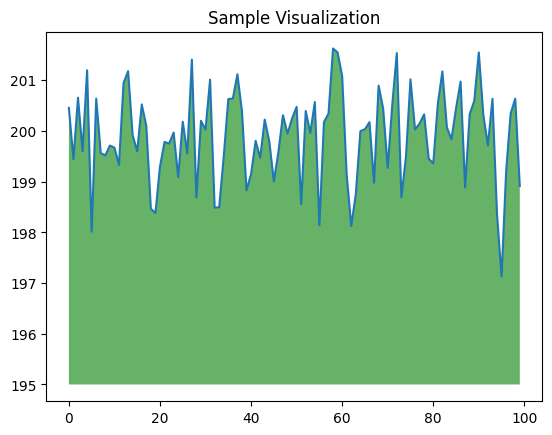

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
